### importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
import math
import numpy as np

### reading file

In [2]:
iris = pd.read_csv("iris.csv")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### seperating label and features

In [3]:
x = iris.drop("species", axis = 1)
y = iris["species"]

### training and testing

In [4]:
clasi = DecisionTreeClassifier()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
clasi.fit(x_train, y_train)

DecisionTreeClassifier()

### getting accuracy

In [5]:
accuracy = clasi.score(x_test, y_test)
print("accuracy score", accuracy)

accuracy score 1.0


#### making predicts

In [6]:
s_length = float(input("enter the s_length"))
s_width = float(input("enter the s_width"))
p_length = float(input("enter the p_length"))
p_width = float(input("enter the p_length"))
data = pd.DataFrame({
    "sepal_length":[s_length],
    "sepal_width":[s_width],
    "petal_length":[p_length],
    "petal_width":[p_width],
})


enter the s_length5.1
enter the s_width3.5
enter the p_length1.4
enter the p_length0.2


In [7]:
def preprocess(data):
    predicted=clasi.predict(data)
    return predicted


In [8]:
preprocess(data)

array(['setosa'], dtype=object)

In [9]:
y_preds = clasi.predict(x_test)
y_preds

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype=object)

### decision tree

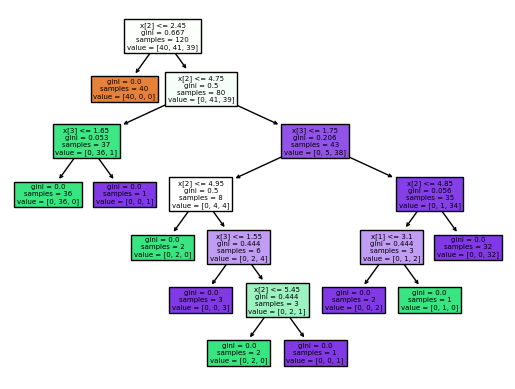

In [10]:
plot_tree(clasi, filled = True);

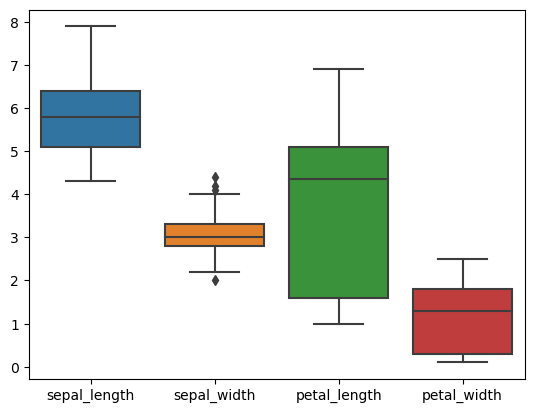

In [11]:
sns.boxplot(data = iris);

In [12]:
tot_species = len(y)
class_counts = y.value_counts()
entropy = 0
for count in class_counts:
    prob = count / tot_species
    entropy = entropy - prob *  math.log2(prob)
print(f"Entropy: {entropy}")

Entropy: 1.584962500721156


In [13]:
def gini_index(labels):
    classes, count = np.unique(labels, return_counts=True)

    prob = count / len(labels)
    gini = 1 - np.sum(prob ** 2)
    return gini



gini = gini_index(y)
print("Gini Index:", gini)


Gini Index: 0.6666666666666667
